In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read data from file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/medical_examination.csv')

In [ ]:
# Preview the data
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Add an overweight column to the data.
# To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters.
# If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

df['overweight'] = (df['weight'] / ((df['height'] / 100)**2)).apply(lambda x: 1 if x > 25 else 0)

In [ ]:
# Normalize data by making 0 always good and 1 always bad.
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)

In [ ]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [ ]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

df_cat['total'] = 1
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()


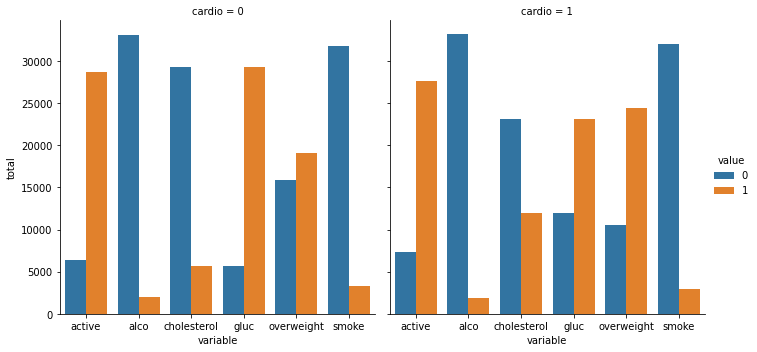

In [ ]:
# Draw the catplot with 'sns.catplot()'
sns.catplot(x="variable", y="total", data=df_cat, hue="value", kind="bar", col="cardio")


In [ ]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi'])
   & (df['height'] >= df['height'].quantile(0.025))
   & (df['height'] <= df['height'].quantile(0.975))
   & (df['weight'] >= df['weight'].quantile(0.025))
   & (df['weight'] <= df['weight'].quantile(0.975))]

In [ ]:
# Calculate the correlation matrix
corr = df_heat.corr(method='pearson')

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))


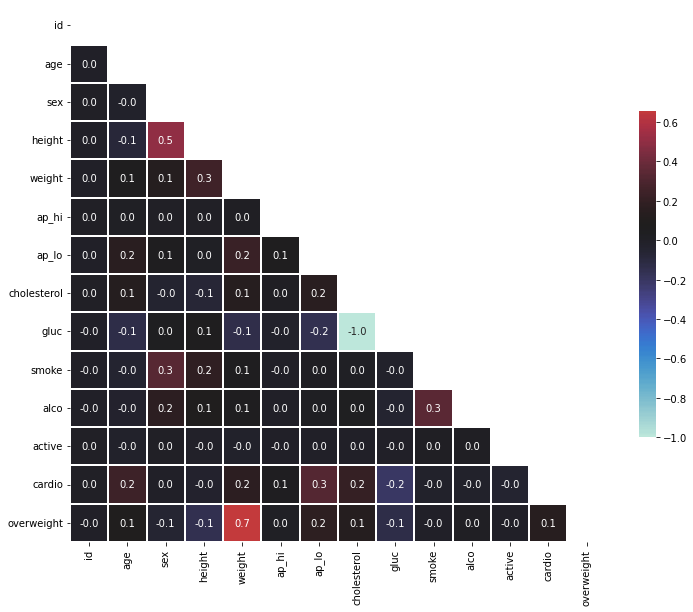

In [ ]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, annot=True, mask=mask, linewidths=1, square=True, fmt=".1f", center=0.08, cbar_kws={"shrink":0.5})